In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset and first impressions
# Variable Identification and Typecasting
# Univariate Analysis : Numerical Variables
# Univariate Analysis : Categorical Variables
# Univariate Analysis : Missing Values Check 
# Univariate Analysis : Oulier Values Check 
# Summary of Univariate Analysis

In [3]:
# Importing dataset and first impressions
df = pd.read_csv("finalTrain.csv")

In [4]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


## Columns to Find Analysis 



- Respective to Delivery Person : 
            Delivery_Person_id, Delivery_Person_Age,
            Delivery_Person_Rating,Multiple_Deliveries,Type_of_order                

- Respective to Location : 
            Restaurant_latitude,Delivery_location_latitude,
            Delivery_location_longitude,City    

- Respective to Delivery of Order : 
            Order_Date,Time_Ordered,Time_Order_picked,Weather_conditions,
            Road_traffic_density ,Vehicle_condition,Type_of_vehicle

- Respective to Order : 
            Festival,TimeTaken

In [5]:
df.shape

(45584, 20)

In [6]:
# Variable Identification and Typecasting
df.dtypes

ID                              object
Delivery_person_ID              object
Delivery_person_Age            float64
Delivery_person_Ratings        float64
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Order_Date                      object
Time_Orderd                     object
Time_Order_picked               object
Weather_conditions              object
Road_traffic_density            object
Vehicle_condition                int64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries            float64
Festival                        object
City                            object
Time_taken (min)                 int64
dtype: object

In [7]:
# Typecasting by datatypes
df.columns[df.dtypes == 'object']

Index(['ID', 'Delivery_person_ID', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Type_of_order', 'Type_of_vehicle', 'Festival', 'City'],
      dtype='object')

In [8]:
# It needs to change into category
df['Delivery_person_ID'] = df['Delivery_person_ID'].astype('category')

# It need to change into datetime for feature engineering
df['Order_Date'].head(2)
df['Order_Date'] = df['Order_Date'].astype('datetime64[ns]')

df['Time_Orderd'].head(2)
# leave it for Feature engineering

df['Time_Order_picked'].head(1)
# leave it for Feature engineering

# Converted into Category
df['Weather_conditions'] = df['Weather_conditions'].astype('category')
df['Road_traffic_density'] = df['Road_traffic_density'].astype('category')
df['Type_of_order'] = df['Type_of_order'].astype('category')
df['Type_of_vehicle'] = df['Type_of_vehicle'].astype('category')
df['Festival'] = df['Festival'].astype('category')
df['City'] = df['City'].astype('category')

In [9]:
df.columns[df.dtypes == 'float64']

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'multiple_deliveries'],
      dtype='object')

In [10]:
# Converted into Int
df['Delivery_person_Age'] = df['Delivery_person_Age'].astype('Int64')

# Not Need to Convert
df['Delivery_person_Ratings'].head()


# Not need to convert latitude longitude  
df['Restaurant_latitude'],df['Restaurant_longitude'],df['Delivery_location_longitude']

# Converted into int
df['multiple_deliveries'] = df['multiple_deliveries'].astype('Int64')


In [11]:
# Not Need to convert Now !!
df.columns[df.dtypes == 'Int64'],df.columns[df.dtypes == 'int64']

(Index(['Delivery_person_Age', 'multiple_deliveries'], dtype='object'),
 Index(['Vehicle_condition', 'Time_taken (min)'], dtype='object'))

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           45584 non-null  object        
 1   Delivery_person_ID           45584 non-null  category      
 2   Delivery_person_Age          43730 non-null  Int64         
 3   Delivery_person_Ratings      43676 non-null  float64       
 4   Restaurant_latitude          45584 non-null  float64       
 5   Restaurant_longitude         45584 non-null  float64       
 6   Delivery_location_latitude   45584 non-null  float64       
 7   Delivery_location_longitude  45584 non-null  float64       
 8   Order_Date                   45584 non-null  datetime64[ns]
 9   Time_Orderd                  43853 non-null  object        
 10  Time_Order_picked            45584 non-null  object        
 11  Weather_conditions           44968 non-nu

In [13]:
# Univariate Analysis : Numerical Variables & Bivariate Analysis

def Numerical_Analysis(col,df):
#     print(col.describe())
    mean = col.mean()
    std = col.std()
    skew = col.skew()
    print("-"*30)
    print("Mean value is :",mean)
    print("Standard Deviation value is",std)
    print("Skewness value is ",skew)
    print("Unique value is :",col.nunique())
    print("*"*30)
    sns.histplot(df,x=col)
    sns.displot(col,kind= "ecdf")
    plt.show()
    
    
def Categorical_Analysis(col):
    print(col.describe()) 
    print("-"*30)
    print("Unique values are :",col.unique())
    print("*"*30)
    sns.countplot(x=col,hue=col)
    plt.show()

------------------------------
Mean value is : 29.566910587697233
Standard Deviation value is 5.815063854587501
Skewness value is  0.018771873099854203
Unique value is : 22
******************************


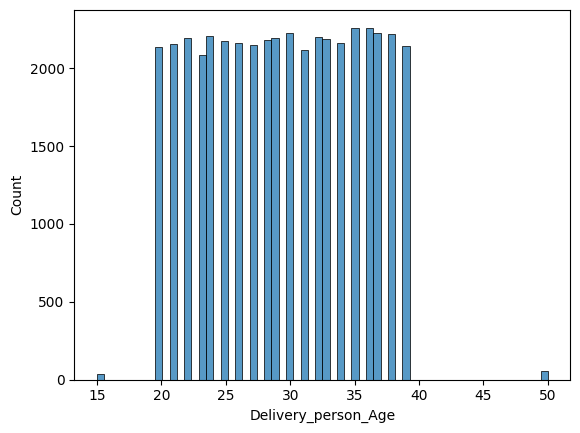

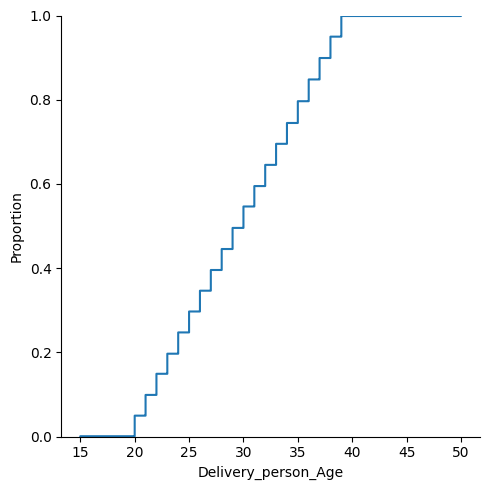

In [14]:
# Respective to Delivery Person :
Numerical_Analysis(df['Delivery_person_Age'],df)

In [15]:
# Delivery of Person Ages is between 20-39 Most.
# There is Younger and Older Age People also there but we can assume they are very less.

------------------------------
Mean value is : 4.6337736972250205
Standard Deviation value is 0.33474372017455284
Skewness value is  -2.4934024575465012
Unique value is : 28
******************************


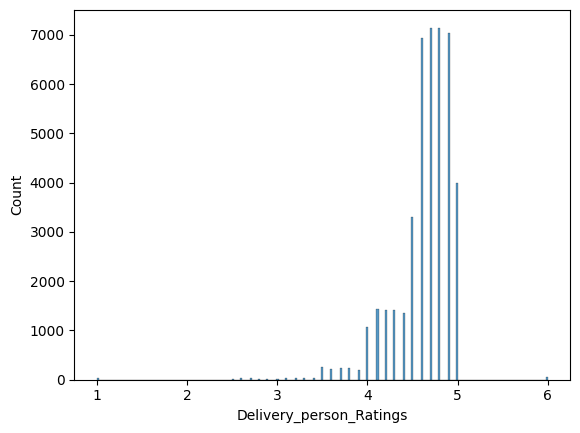

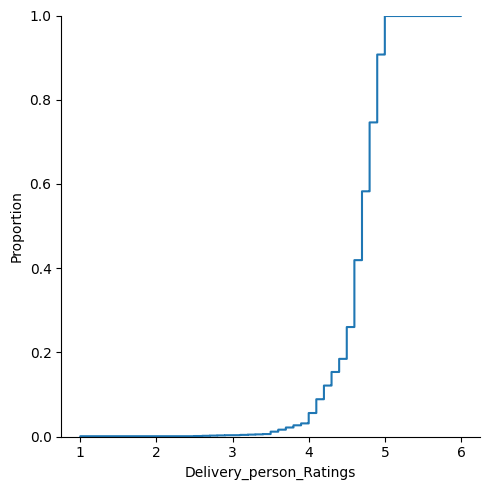

In [16]:
Numerical_Analysis(df['Delivery_person_Ratings'],df)

In [17]:
# Delivery Person Rating Most of are between 4.5 and 4.9 
# we can clearly seen it is right Skewed

------------------------------
Mean value is : 0.7446345675136238
Standard Deviation value is 0.5725098447368803
Skewness value is  0.32487113290381786
Unique value is : 4
******************************


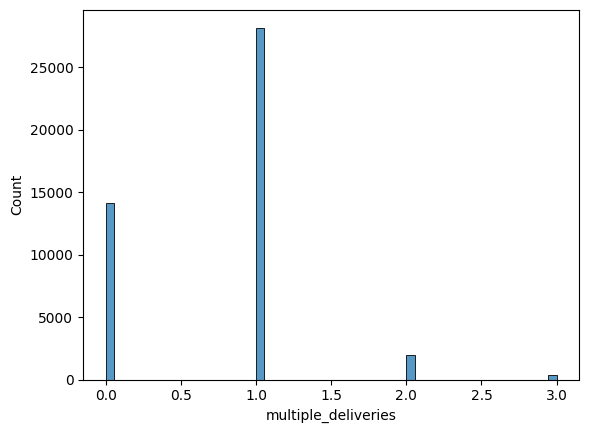

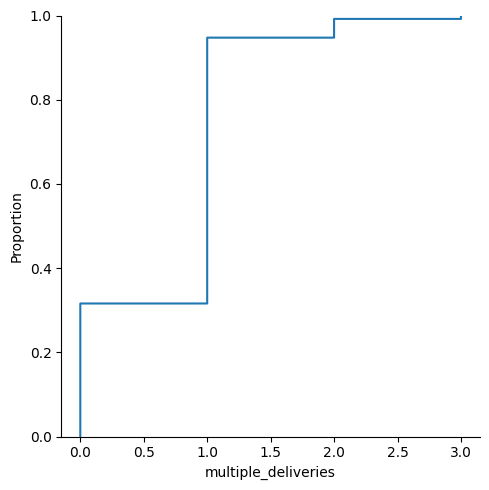

In [18]:
Numerical_Analysis(df['multiple_deliveries'],df)

In [19]:
# Most Delivery Person  has only '1'  Delivery

count     45584
unique        4
top       Snack
freq      11530
Name: Type_of_order, dtype: object
------------------------------
Unique values are : ['Snack', 'Meal', 'Drinks', 'Buffet']
Categories (4, object): ['Buffet', 'Drinks', 'Meal', 'Snack']
******************************


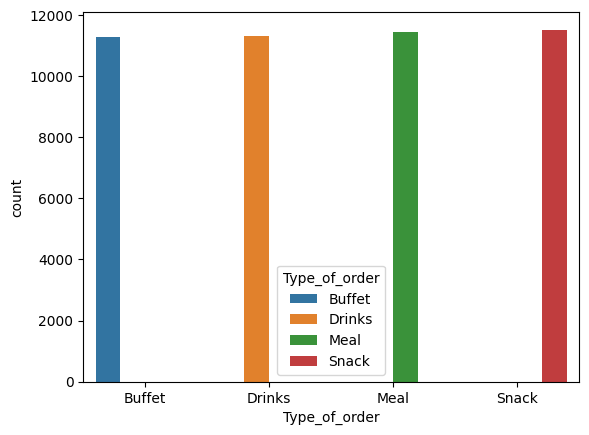

In [20]:
Categorical_Analysis(df['Type_of_order'])

In [21]:
# All type of order are on demand :
# But We Can Say Snack and Meal are Most

In [22]:
# Respective to Location :   

count             44384
unique                3
top       Metropolitian
freq              34087
Name: City, dtype: object
------------------------------
Unique values are : ['Metropolitian', 'Urban', 'Semi-Urban', NaN]
Categories (3, object): ['Metropolitian', 'Semi-Urban', 'Urban']
******************************


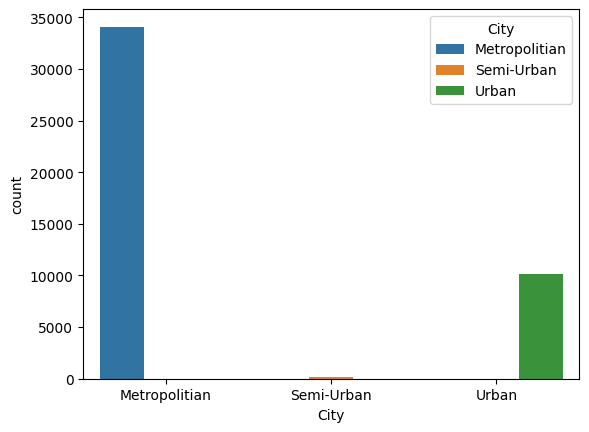

In [23]:
Categorical_Analysis(df['City'])

In [24]:
# Metropolition City are the highest. 
# We can further find it out in Bivariate Analysis.

In [25]:
# Restarant Location Data : RestaurantLocation(Long,Lat) , DeliveryLocation(Long,lat)

import geopy as gp
# instiate a geolocator
gl = gp.geocoders.Nominatim(user_agent="my_test")
locations = []    # Create empty list
for i,j in zip(df['Restaurant_latitude'].head(10),df['Restaurant_longitude'].head(10)):
    locations.append(gl.reverse((i,j)))   
# Location of Some City
city = pd.DataFrame(locations)
print(city[0]) # Restaurant City 

locations1 = []    # Create empty list
for i,j in zip(df['Delivery_location_latitude'].head(10),df['Delivery_location_longitude'].head(10)):
    locations1.append(gl.reverse((i,j)))    
    
deliveryplace = pd.DataFrame(locations1)
print(deliveryplace[0])


# These are some sample of Restaurant location and Delivery Location

0    South Indian Vibes, Rajpur-Mussoorie Road, set...
1    City Silks, Civil Line Road, Palarivattom, Ern...
2    Phoenix Marketcity, 207, Viman Nagar Road, War...
3    CoBSc&H, Ferozepur Road, Gurudev Nagar, Ludhia...
4    Kanpur Cantonment, Kanpur, Kanpur Nagar, Uttar...
5    Bangur Nagar, P/S Ward, Zone 4, Mumbai, Mumbai...
6    RRR Hotel, Gandhi Square, Mandi Mohalla, Mysur...
7    Om Sai medical and surgical, Kaspate Vasti Roa...
8    Road Number 45, Nandagiri Hills, Ward 95 Jubil...
9    Waffle Wallah, 18G, Park Street, Mallick Bazaa...
Name: 0, dtype: object
0        unknown, Dehradun, Uttarakhand, 248001, India
1    Ernakulam, Kanayannur, Ernakulam district, Ker...
2                   Haveli, Maharashtra, 412216, India
3    Ludhiana, Ludhiana (West) Tahsil, Ludhiana, Pu...
4                  Unnao, Uttar Pradesh, 209800, India
5           Gaimukh, Thane, Maharashtra, 400615, India
6    Kamanakere Hundi, Mysuru taluk, Mysuru distric...
7    Chakan-Alandi (Alankapuri) Road, Alan

In [26]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)'],
      dtype='object')

In [27]:
# Respective to Delivery of Order :

In [28]:
print(df['Order_Date'].value_counts().head(10))
print(df['Order_Date'].nunique())

# We can Assume Here On 15-March There were Many Delivery Happening 
# We will compare more in Bivariate analysis with other features 

2022-03-15    1192
2022-03-04    1178
2022-03-13    1169
2022-03-26    1165
2022-03-24    1162
2022-09-03    1159
2022-05-04    1156
2022-05-03    1154
2022-07-03    1153
2022-03-03    1150
Name: Order_Date, dtype: int64
44


In [29]:

print(df[['Time_Orderd','Time_Order_picked']].value_counts())
# timetaken in delivery  
print(df['Time_Orderd'].unique()[:10])
print()
print(df['Time_Order_picked'].unique()[:10])

# With this we can say there is 45 minutes ,or 30 minutes difference btw orded and pickup time

Time_Orderd  Time_Order_picked
21:35        21:45                169
23:30        23:45                164
22:45        22:50                163
21:10        21:15                163
23:40        23:50                163
                                 ... 
15:30        15:35                 14
14:15        14:30                 14
14:30        14:45                 13
16:30        16:35                 11
15:20        15:25                 11
Length: 528, dtype: int64
['21:55' '14:55' '17:30' '09:20' '19:50' '20:25' '20:30' '20:40' '21:15'
 '20:20']

['22:10' '15:05' '17:40' '09:30' '20:05' '20:35' '15:10' '20:40' '20:50'
 '21:30']


count     44968
unique        6
top         Fog
freq       7653
Name: Weather_conditions, dtype: object
------------------------------
Unique values are : ['Fog', 'Stormy', 'Sandstorms', 'Windy', 'Cloudy', 'Sunny', NaN]
Categories (6, object): ['Cloudy', 'Fog', 'Sandstorms', 'Stormy', 'Sunny', 'Windy']
******************************


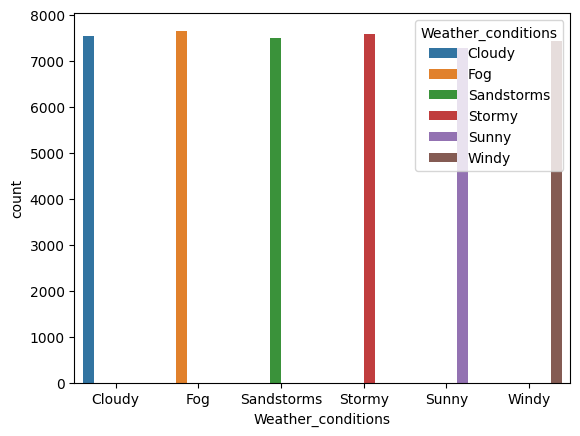

In [30]:
Categorical_Analysis(df['Weather_conditions'])

In [31]:
# All type weather condition we can see Delivery Person is facing
# We can see more in Bivariate analysis 

count     44983
unique        4
top         Low
freq      15476
Name: Road_traffic_density, dtype: object
------------------------------
Unique values are : ['Jam', 'High', 'Medium', 'Low', NaN]
Categories (4, object): ['High', 'Jam', 'Low', 'Medium']
******************************


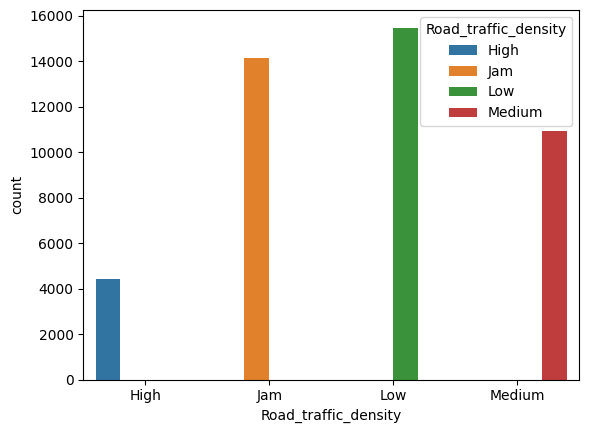

In [32]:
Categorical_Analysis(df['Road_traffic_density'])

In [33]:
# Road Traffic Density Mostly low so there are chances of fast delivery 
# We will further more analysis with other feature 

------------------------------
Mean value is : 1.0233853983853984
Standard Deviation value is 0.8390554344087541
Skewness value is  0.0718302368608196
Unique value is : 4
******************************


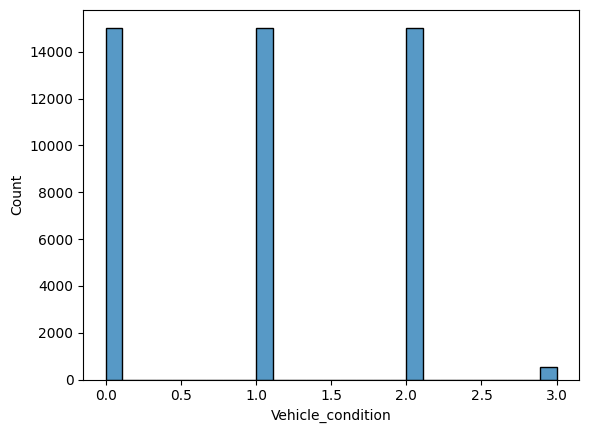

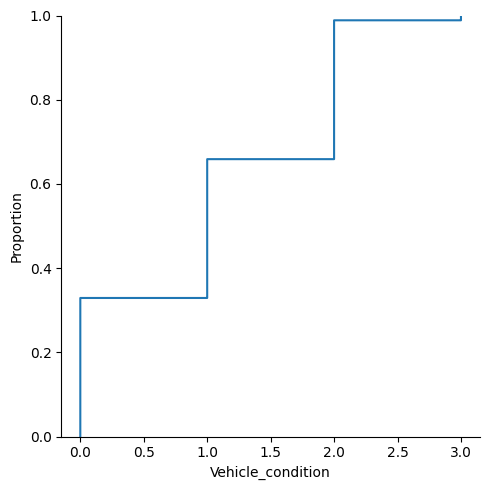

<class 'pandas.core.series.Series'>
RangeIndex: 45584 entries, 0 to 45583
Series name: Vehicle_condition
Non-Null Count  Dtype
--------------  -----
45584 non-null  int64
dtypes: int64(1)
memory usage: 356.2 KB


,Vehicle_condition,Time_taken (min)
Vehicle_condition,1.000000,-0.234456
Time_taken (min),-0.234456,1.000000


In [34]:
Numerical_Analysis(df['Vehicle_condition'],df)
df['Vehicle_condition'].info()
# We can assume the condition of vechile - Good:0 better:1 Excellent:2 worst:3
# our all such vechile condition ratio are equal only few of them are worst. 


df[['Vehicle_condition','Time_taken (min)']].corr() # Also Vechile is not Contributing Much with our target variable we remove it later 

count          45584
unique             4
top       motorcycle
freq           26429
Name: Type_of_vehicle, dtype: object
------------------------------
Unique values are : ['motorcycle', 'scooter', 'electric_scooter', 'bicycle']
Categories (4, object): ['bicycle', 'electric_scooter', 'motorcycle', 'scooter']
******************************


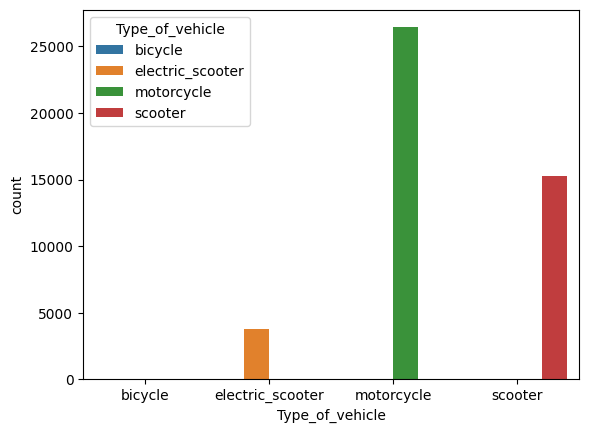

In [35]:
Categorical_Analysis(df['Type_of_vehicle'])

In [36]:
# Most of Delivery Vechile type are Motorcycle,then Scooter,electric_Scooter
# Will Find More in Univariate

count     45356
unique        2
top          No
freq      44460
Name: Festival, dtype: object
------------------------------
Unique values are : ['No', 'Yes', NaN]
Categories (2, object): ['No', 'Yes']
******************************


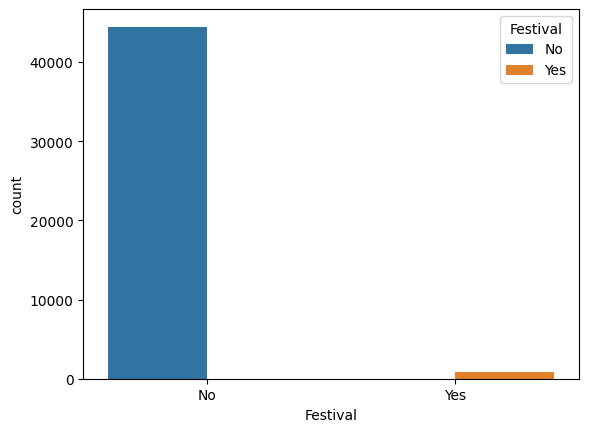

In [37]:
# Respective to Order - Festival
Categorical_Analysis(df['Festival'])

In [38]:
# Most of delivery's are Non Festival
# Also there are some NAN values 

------------------------------
Mean value is : 26.293962793962795
Standard Deviation value is 9.38429773366795
Skewness value is  0.48608612493233827
Unique value is : 45
******************************


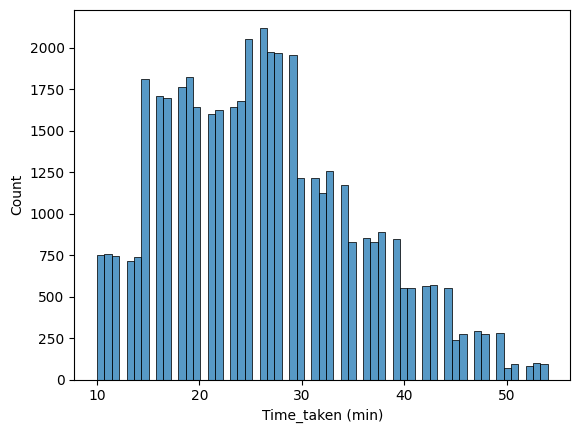

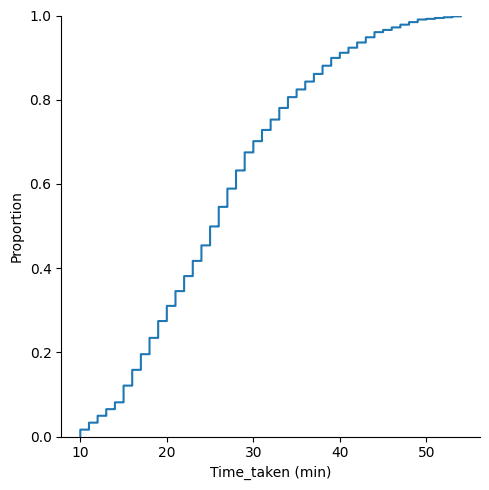

In [39]:
Numerical_Analysis(df['Time_taken (min)'],df)

In [40]:
# We can Probably say the fastest delivery are beteween 25-30 Minutes 
# We also already Verified this with time of delivered and  and time of ordered pick.
# Will Further do More Analysis this with other variable !!!

In [41]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)'],
      dtype='object')

In [42]:
# finding number of missing values in every variable
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [43]:
## check for duplicated records
df.duplicated().sum()

0

In [44]:
# Outlier Analysis

In [45]:
columns = df.select_dtypes(exclude=['object','category']).columns

In [46]:
columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Vehicle_condition',
       'multiple_deliveries', 'Time_taken (min)'],
      dtype='object')

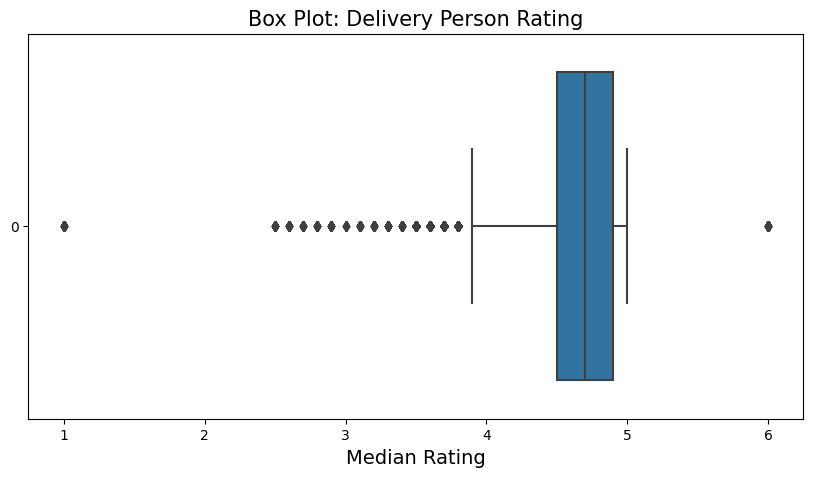

In [47]:
# Outlier Analysis
fig = plt.figure(figsize=(10,5))
sns.boxplot(df.Delivery_person_Ratings,orient='h')
plt.title('Box Plot: Delivery Person Rating', fontsize=15)
plt.xlabel('Median Rating', fontsize=14)
plt.show()

# In this Case 6 we can say it is a outlier but it is subjective

In [48]:
dataset = df.copy()

In [49]:
''' Detecting Outlier'''

def outlier(dataset,ft):
    q1 = dataset[ft].quantile(0.25)
    q3 = dataset[ft].quantile(0.75)
    IQR = q3 - q1
    lb = q1 - 1.5 * IQR
    ub = q3 + 1.5 * IQR
    ls = dataset.index[ (dataset[ft] < lb) | (df[ft] > ub)]
    return ls 

In [50]:
index_list = []

for feature in dataset.select_dtypes(exclude=['object','category']).columns:
    index_list.extend(outlier(dataset,feature))

In [51]:
# Removed All Outlier 
def remove(dataset,ls):
    ls = sorted(set(ls))
    dataset = dataset.drop(ls)
    return dataset
    
df_cleaned = remove(dataset,index_list)
df_cleaned.shape

(31605, 20)

In [52]:
(df.shape, df_cleaned.shape)

((45584, 20), (31605, 20))

In [53]:
df = df_cleaned

<Axes: >

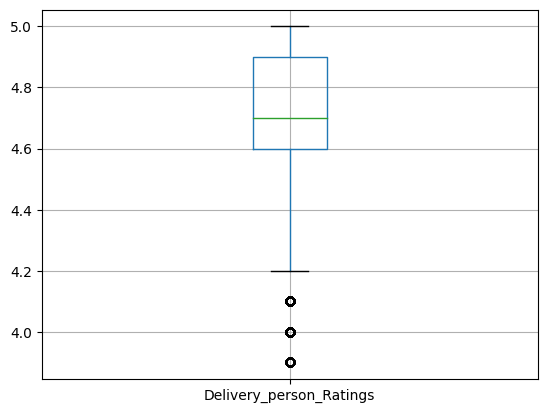

In [54]:
df_cleaned.boxplot(column=['Delivery_person_Ratings'])
# It Reduced from Before

In [55]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
1,0xd987,KOCRES16DEL01,21,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,14:55,15:05,Stormy,High,1,Meal,motorcycle,1,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23,4.7,18.562450,73.916619,18.652450,74.006619,2022-04-03,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,19:50,20:05,Fog,Jam,1,Snack,scooter,1,No,Metropolitian,41
5,0x3af3,MUMRES15DEL03,29,4.5,19.176269,72.836721,19.266269,72.926721,2022-02-04,20:25,20:35,Sandstorms,Jam,2,Buffet,electric_scooter,1,No,Metropolitian,20


<Axes: >

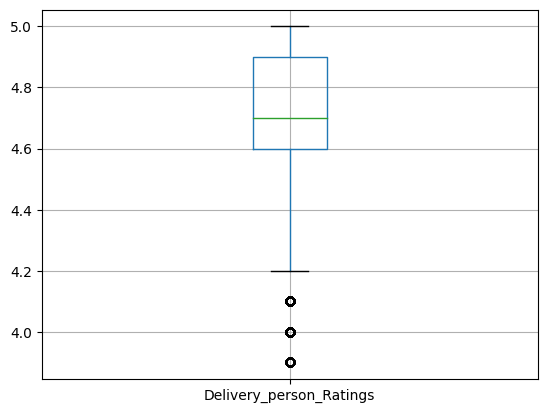

In [56]:

df.boxplot(column=['Delivery_person_Ratings'])


In [57]:
# Summary of Univariate Analysis

# Delivery of Person Ages is between 20-39 Most.
# There is Younger and Older Age People also there but we can assume they are very less.
# Delivery Person Rating Most of are between 4.5 and 4.9 !
# In Delivery Rating there is 5 rating only , 6 is an outlier We can Say Need to Find More in this !! Why It is Happening 
# Most Delivery Person  has only '1'  Delivery !
# But We Can Say Snack and Meal are Most
# Metropolition City are the highest. Also It has some NaN values !
# Assume Here On 15-March There were Many Delivery Happening !
# there is 45 minutes ,or 30 minutes difference btw orded and pickup time Also there are some outliers and nan value also.
# All type weather condition we can see Delivery Person is facing Also there is some percentage of Nan value !
# Road Traffic Density Mostly low so there are chances of fast delivery  !
# Our all such vechile condition ratio are equal only few of them are worst. 
# Most of Delivery Vechile type are Motorcycle,then Scooter,electric_Scooter
# Most of delivery's are Non Festival Cycle Also there are some NAN values  !! 
# We can Probably say the fastest delivery are beteween 25-30 Minutes Using Time Taken Variable
# In Time Taken there os above 50 minutes Delivery which is an outlier ,but there might be case due to weather or other condition or something so we need to find out!!



<p> Things to investigate further down: </p>
<li>
1. Delivery Person Age
    # Do this Person Age has some relation with Time Taken ?
</li><li>
2. Delivery Rating
    # Is Delivery Rating is not given because time taken too much ? 
</li><li>
3. Time Ordered 
    # Is Time Ordered has some relation with Time taken ?
</li><li>
4. Weather Condition 
   # Are weather condition affection that why it is takes time ?
</li><li>
5. Road Traffic Density :
    # Is there any relation with Time Taken ?
</li><li>
6. Multiple Deliveres:
    # Because of Multiple Deliveries Time Taken Any relation ?
</li><li>
7. Festival :
    # Is Festival season affecting Time taken for delivery ?   
</li><li>
8. City : 
    # Because of City type time taken affected?
</li>    


In [58]:
# Bivariate Analysis : Numerical Numerical
# Bivariate Analysis : Numerical Categorical
# Bivariate Analysis : Categorical Categorical
# Summary of Bivariate analysis

In [59]:
# Bivariate Analysis : Numerical Numerical

In [60]:
# isolating numerical datatypes
numerical = df_cleaned.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

Delivery_person_Age              Int64
Delivery_person_Ratings        float64
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Vehicle_condition                int64
multiple_deliveries              Int64
Time_taken (min)                 int64
dtype: object

In [61]:
# calculating correlation
correlation = df_cleaned.corr()
correlation

# Our Investigation Some Point relation Check :

# There is Relation B/w latitude longitute - which is we can drop later  
# Delivery Person Age has Not Much Relation With Time Taken 
# Delivery Rating has no relation with Time Taken 


,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
Delivery_person_Age,1.000000,-0.118038,0.004372,0.002188,0.004228,0.001883,-0.004789,0.113691,0.305556
Delivery_person_Ratings,-0.118038,1.000000,-0.005778,0.003432,-0.006052,0.002843,0.116523,-0.103716,-0.327915
Restaurant_latitude,0.004372,-0.005778,1.000000,-0.233132,0.999977,-0.232682,0.001195,0.016538,0.017263
Restaurant_longitude,0.002188,0.003432,-0.233132,1.000000,-0.233320,0.999896,0.006782,0.001372,-0.012893
Delivery_location_latitude,0.004228,-0.006052,0.999977,-0.233320,1.000000,-0.232774,0.001221,0.017289,0.019339
Delivery_location_longitude,0.001883,0.002843,-0.232682,0.999896,-0.232774,1.000000,0.006840,0.002994,-0.008435
Vehicle_condition,-0.004789,0.116523,0.001195,0.006782,0.001221,0.006840,1.000000,-0.080831,-0.236510
multiple_deliveries,0.113691,-0.103716,0.016538,0.001372,0.017289,0.002994,-0.080831,1.000000,0.340634
Time_taken (min),0.305556,-0.327915,0.017263,-0.012893,0.019339,-0.008435,-0.236510,0.340634,1.000000


In [62]:
# Our Time Order picked and Time Ordered Need Some Change It Good To Do Now !!! 
# With this We can get some Information of these variable

df['Time_Order_picked'] = df['Time_Order_picked'].replace('24:05:00','24:05')
df['Time_Order_picked'] = df['Time_Order_picked'].replace('24:10:00','24:10')
df['Time_Order_picked'] = df['Time_Order_picked'].replace('24:15:00','24:15')

#From this two variable  - Will Create one New Variable which give more information
df['Time_Orderd'] = df['Time_Orderd'].replace(r':', '.', regex=True).astype('float')
df['Time_Order_picked'] = df['Time_Order_picked'].replace(r':', '.', regex=True).astype('float')

df['Order_pickup_time']  = abs(round(df['Time_Order_picked'] - df['Time_Orderd'],2))

# Removing Time Ordered and Time Order Pickup time we dont need now 

df.drop(columns=['Time_Orderd'],axis=1,inplace=True)
df.drop(columns=['Time_Order_picked'],axis=1,inplace=True)




In [63]:
df['Order_pickup_time'] = df['Order_pickup_time'].abs()

In [64]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Order_pickup_time
1,0xd987,KOCRES16DEL01,21,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,Stormy,High,1,Meal,motorcycle,1,No,Metropolitian,23,0.50
2,0x2784,PUNERES13DEL03,23,4.7,18.562450,73.916619,18.652450,74.006619,2022-04-03,Sandstorms,Medium,1,Drinks,scooter,1,No,Metropolitian,21,0.10
3,0xc8b6,LUDHRES15DEL02,34,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,Sandstorms,Low,0,Buffet,motorcycle,0,No,Metropolitian,20,0.10
4,0xdb64,KNPRES14DEL02,24,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,Fog,Jam,1,Snack,scooter,1,No,Metropolitian,41,0.55
5,0x3af3,MUMRES15DEL03,29,4.5,19.176269,72.836721,19.266269,72.926721,2022-02-04,Sandstorms,Jam,2,Buffet,electric_scooter,1,No,Metropolitian,20,0.10


In [65]:
#  Is Time Ordered + Ordered Pickup has some relation with Time taken ?
df.corr()

# So the Answer is No There is No Relation b/w them .

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min),Order_pickup_time
Delivery_person_Age,1.000000,-0.118038,0.004372,0.002188,0.004228,0.001883,-0.004789,0.113691,0.305556,-0.008543
Delivery_person_Ratings,-0.118038,1.000000,-0.005778,0.003432,-0.006052,0.002843,0.116523,-0.103716,-0.327915,0.005698
Restaurant_latitude,0.004372,-0.005778,1.000000,-0.233132,0.999977,-0.232682,0.001195,0.016538,0.017263,0.002996
Restaurant_longitude,0.002188,0.003432,-0.233132,1.000000,-0.233320,0.999896,0.006782,0.001372,-0.012893,-0.018368
Delivery_location_latitude,0.004228,-0.006052,0.999977,-0.233320,1.000000,-0.232774,0.001221,0.017289,0.019339,0.003453
Delivery_location_longitude,0.001883,0.002843,-0.232682,0.999896,-0.232774,1.000000,0.006840,0.002994,-0.008435,-0.017392
Vehicle_condition,-0.004789,0.116523,0.001195,0.006782,0.001221,0.006840,1.000000,-0.080831,-0.236510,0.006580
multiple_deliveries,0.113691,-0.103716,0.016538,0.001372,0.017289,0.002994,-0.080831,1.000000,0.340634,0.007271
Time_taken (min),0.305556,-0.327915,0.017263,-0.012893,0.019339,-0.008435,-0.236510,0.340634,1.000000,0.016459
Order_pickup_time,-0.008543,0.005698,0.002996,-0.018368,0.003453,-0.017392,0.006580,0.007271,0.016459,1.000000


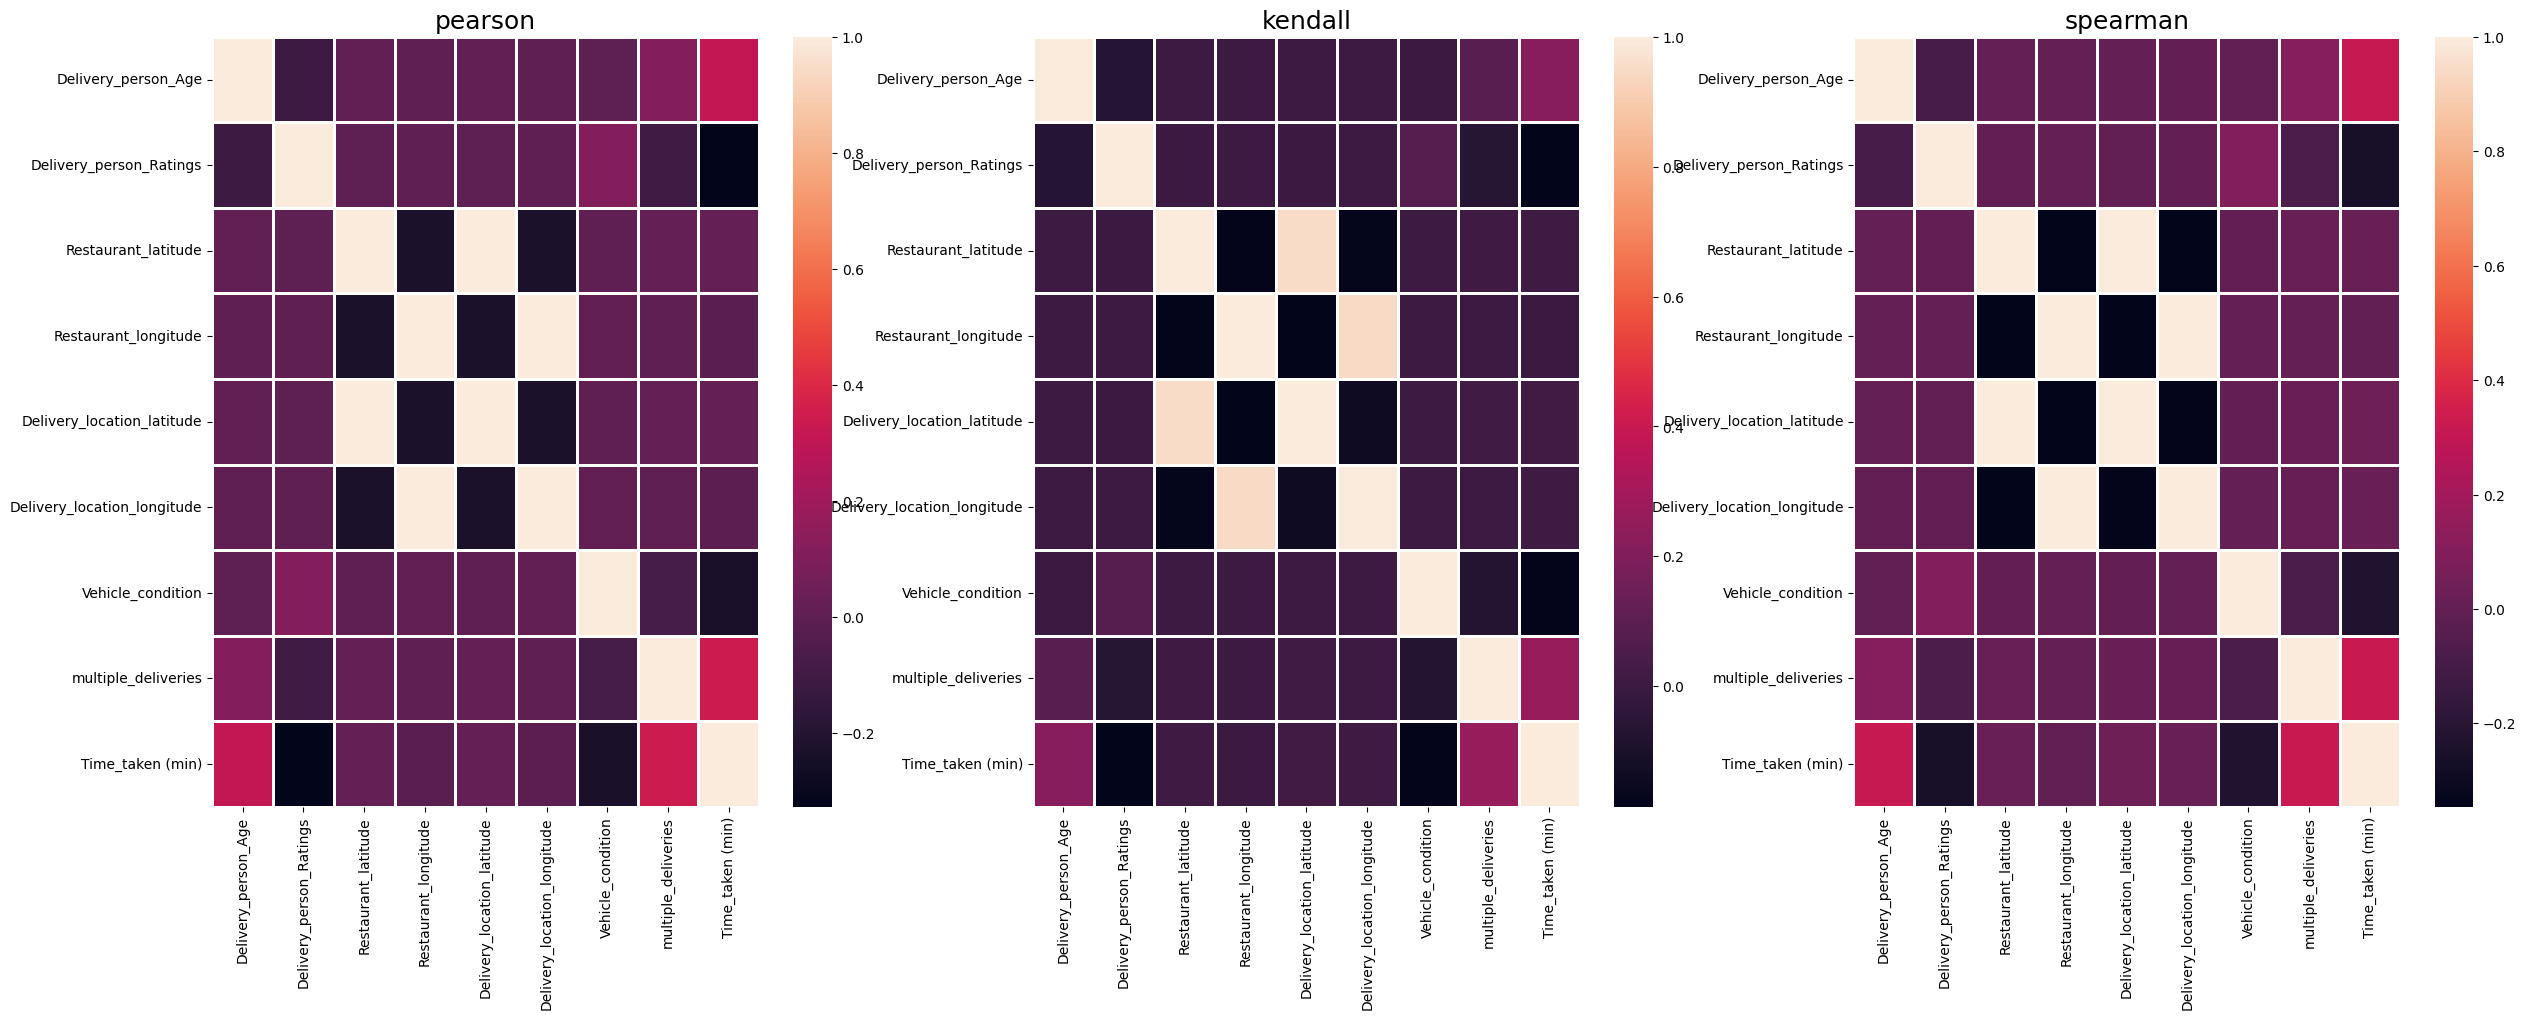

In [66]:
# plotting heatmap usingl all methods for all numerical variables (peason, kendall, spearman)
plt.figure(figsize=(30,10))
for j,i in enumerate(['pearson','kendall','spearman']):
    plt.subplot(1,3,j+1)
    correlation = numerical.corr(method=i)
    sns.heatmap(correlation, linewidth = 2)
    plt.title(i, fontsize=18)
    
# With this Time Taken and Delivery Person has some small of correlation which is less then 0.6. 
# Time Taken and Multiple Deliveries also small of correlation which is also less then 0.6. 
# Here Also with the diagram showing latitude and longitude How Correlatting which is Normal.

<Figure size 896x672 with 0 Axes>

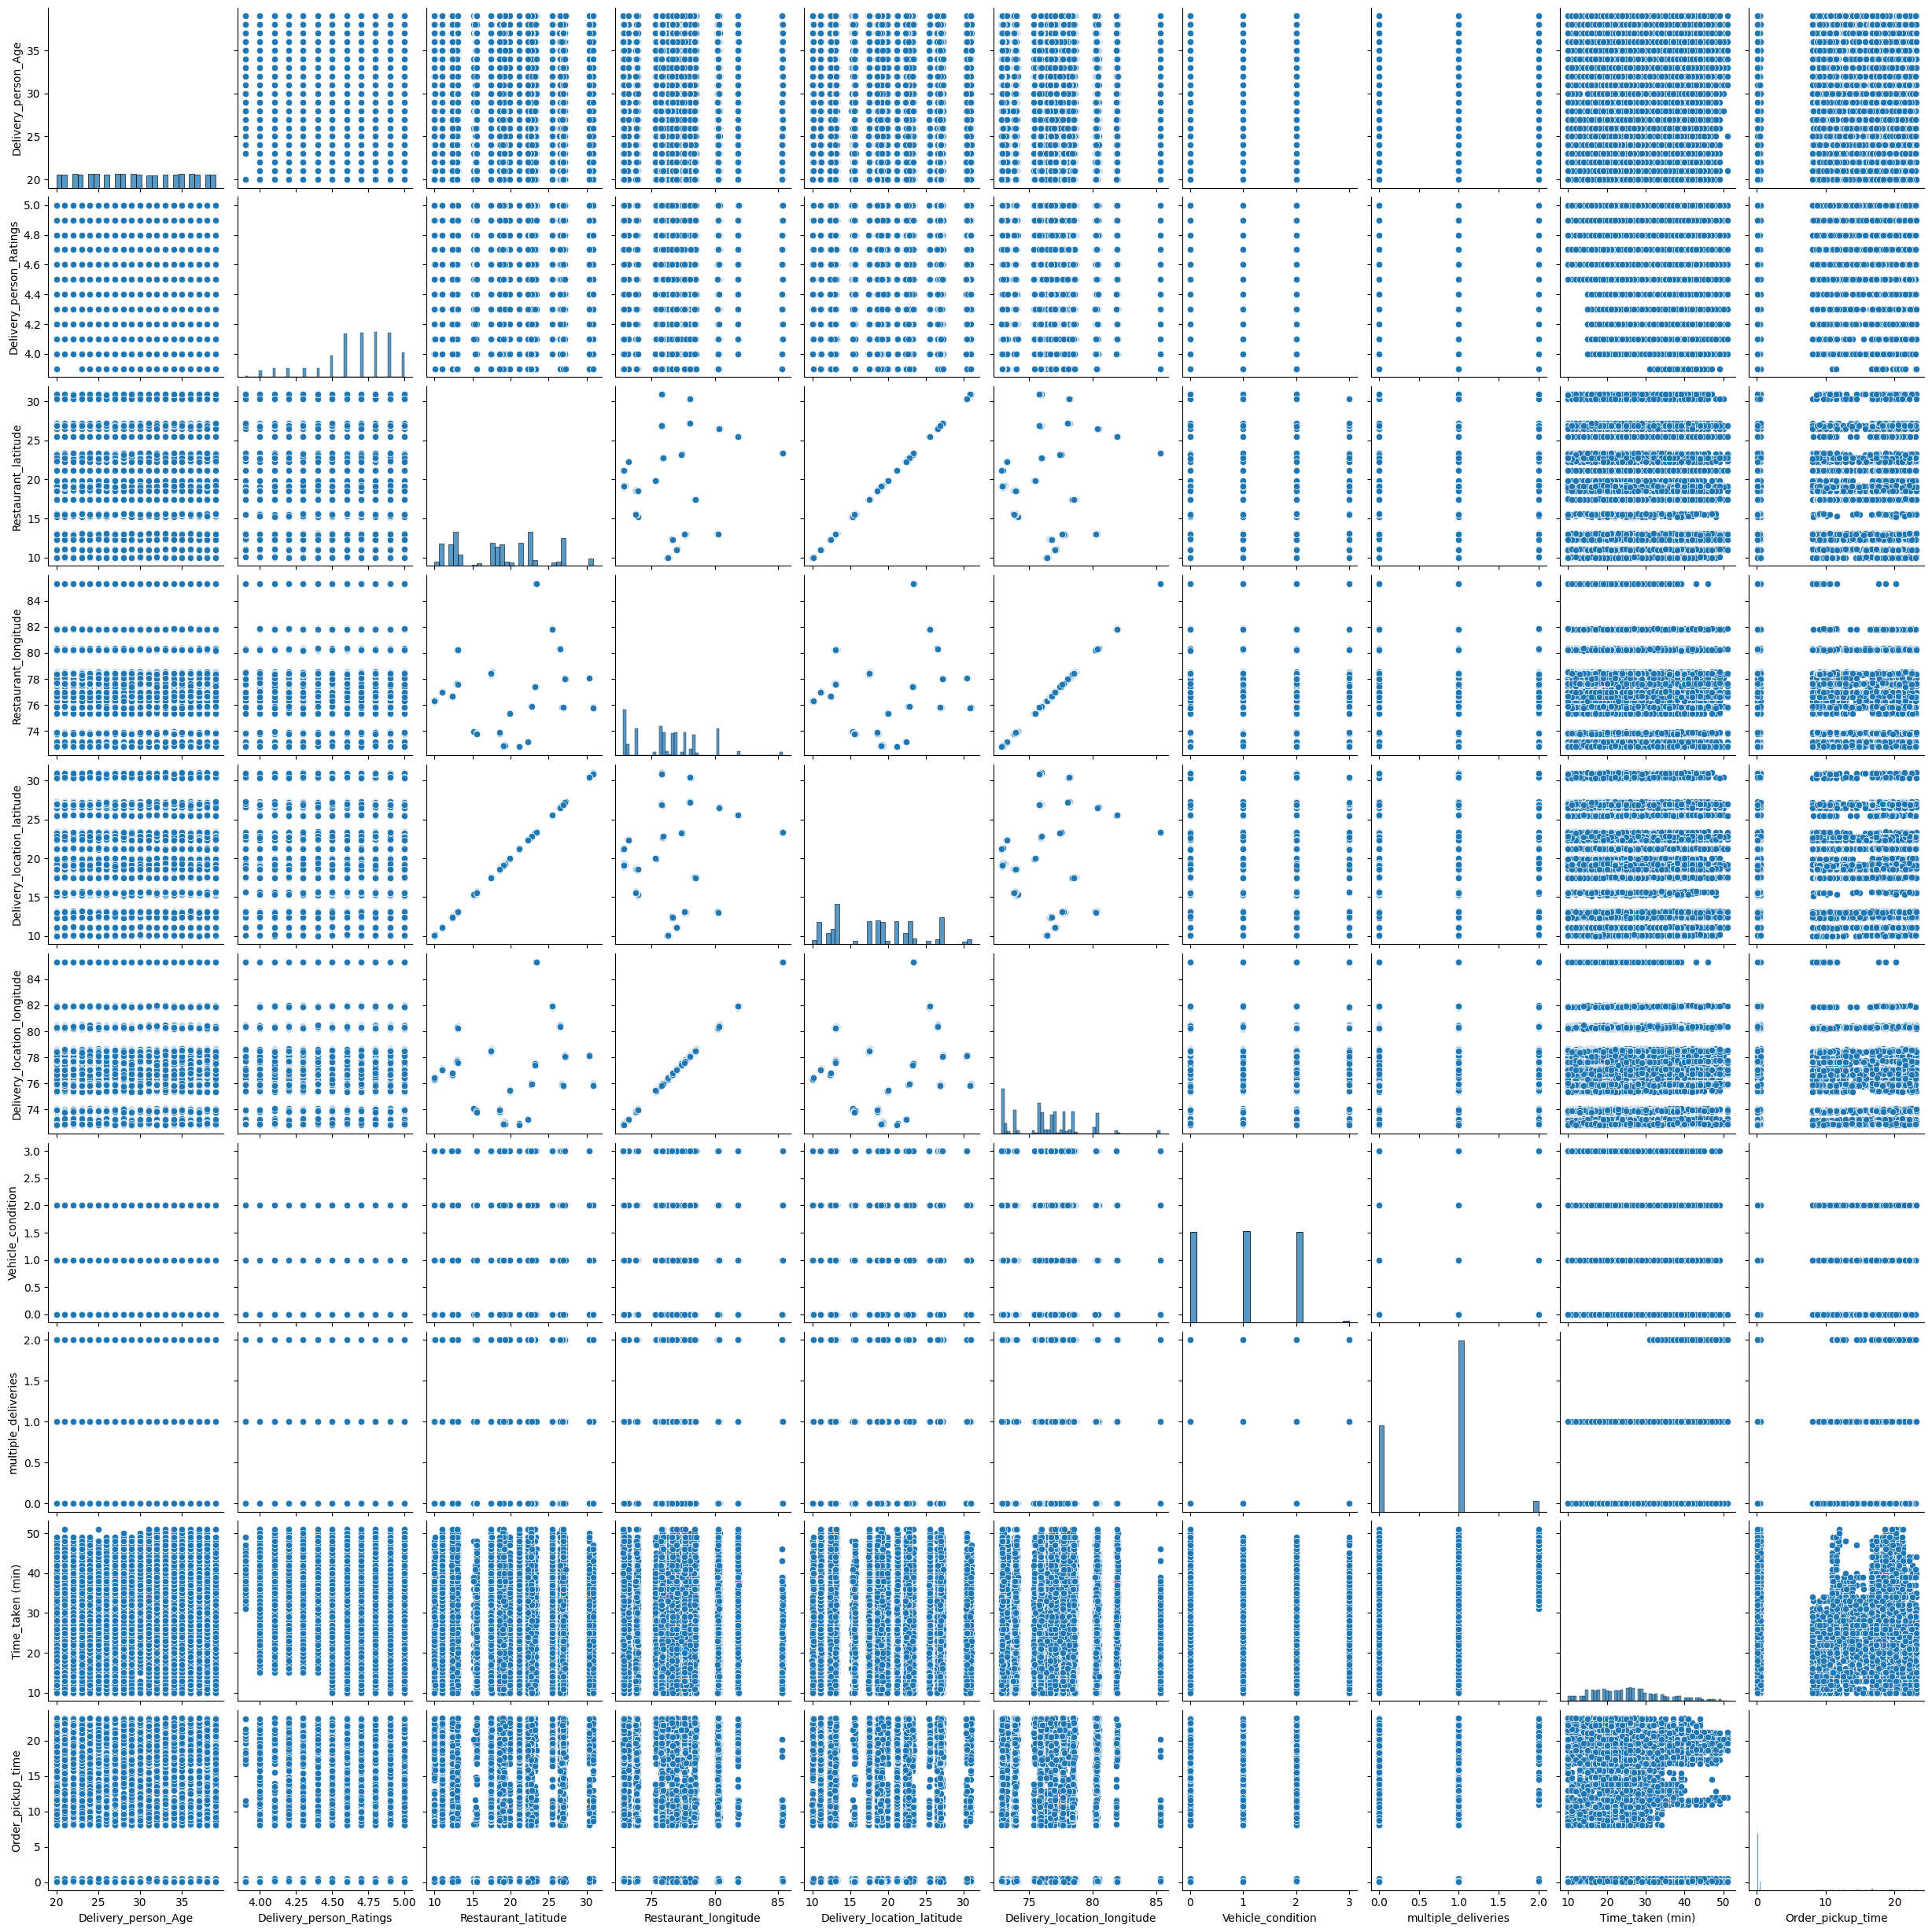

In [67]:
# Let Drawn a scatter Diagram :
numerical = df.select_dtypes(exclude=['object','category'])
# scatter plot for transactional variables
plt.figure(dpi=140)
sns.pairplot(numerical)
plt.show()

In [68]:
# This validates there is  No much correlation between the variables.
# Also There is Vechile 

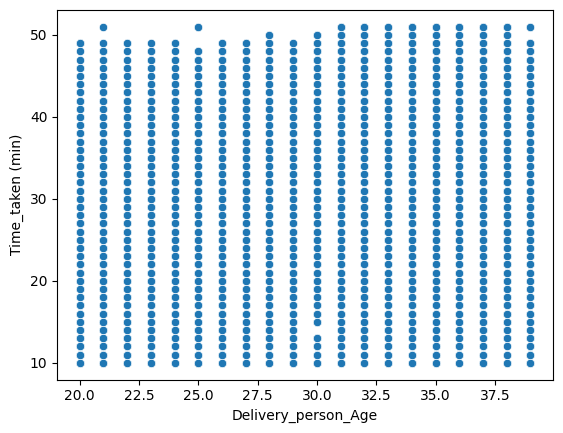

In [69]:
# Will Validate More by Plotting variable 

sns.scatterplot(x=df['Delivery_person_Age'], y=df['Time_taken (min)'])
plt.show()

# No Correlation

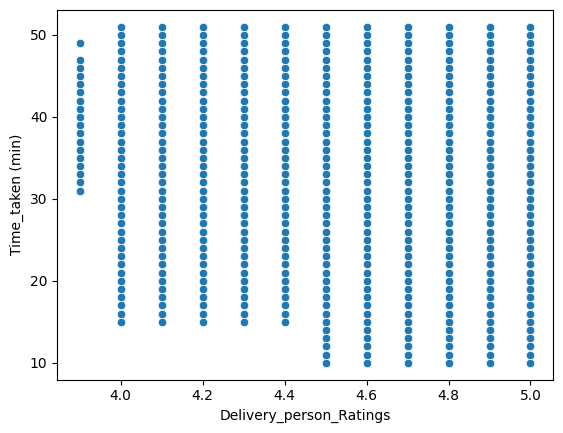

In [70]:

sns.scatterplot(x=df['Delivery_person_Ratings'], y=df['Time_taken (min)'])
plt.show()

# No correlation

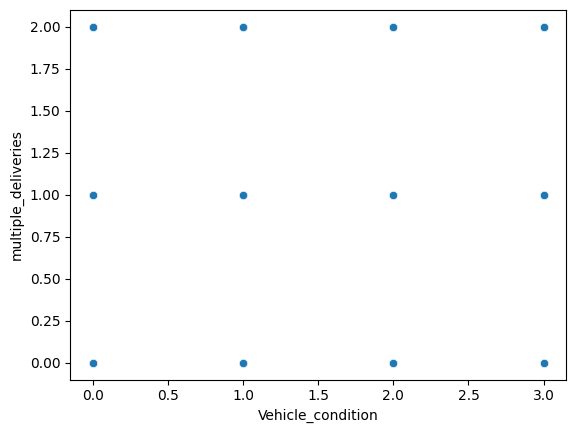

In [71]:

sns.scatterplot(x=df['Vehicle_condition'], y=df['multiple_deliveries'])
plt.show()


# No correlation 

In [72]:
# Bivariate Analysis : Numerical Categorical


In [73]:
# Let Define One function for it 

def Bivariate_cont_cat(data, cont, cat):
    plt.figure(figsize=(20,10))
    table = pd.pivot_table(data=data, values=cont, columns=cat,aggfunc=np.mean)
    print(table)
    sns.barplot(table)
    plt.show()
    sns.boxplot(x=cat, y=cont, data=data)
    plt.show()

In [74]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken (min)', 'Order_pickup_time'],
      dtype='object')

In [75]:
# We have Order Date will Get Necassary Information from that

df['Year'] = df['Order_Date'].dt.year
df['Month'] = df['Order_Date'].dt.month
df['Day'] = df['Order_Date'].dt.day

# We can Drop the Order_Date Variable Now
df.drop(columns=['Order_Date'],axis=1,inplace=True)

Weather_conditions    Cloudy        Fog  Sandstorms     Stormy      Sunny  \
Time_taken (min)    28.25384  28.225355   25.242395  25.256473  20.655152   

Weather_conditions      Windy  
Time_taken (min)    25.545507  


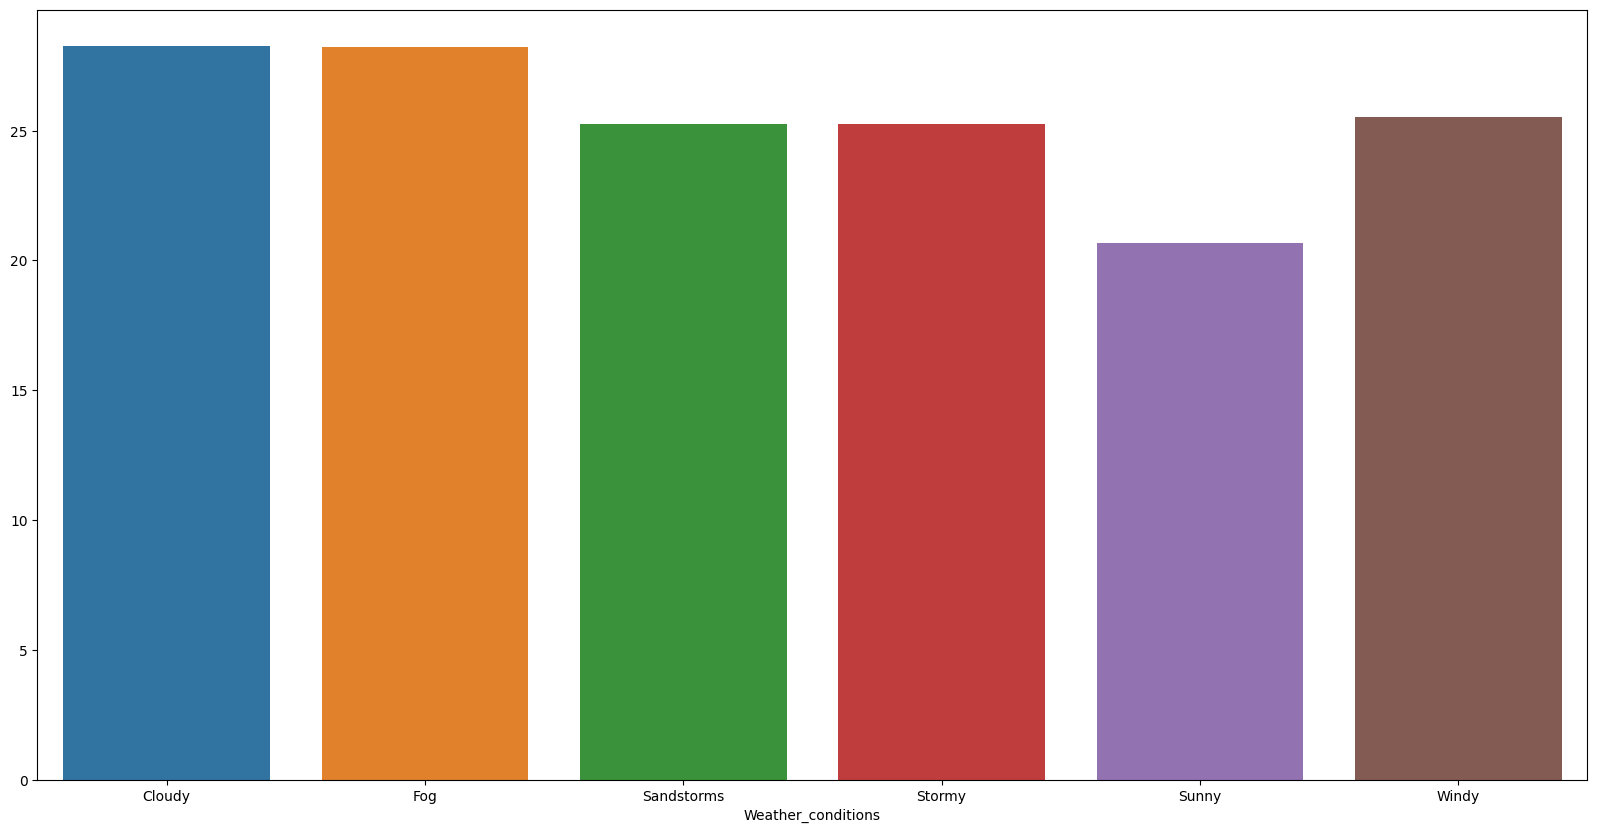

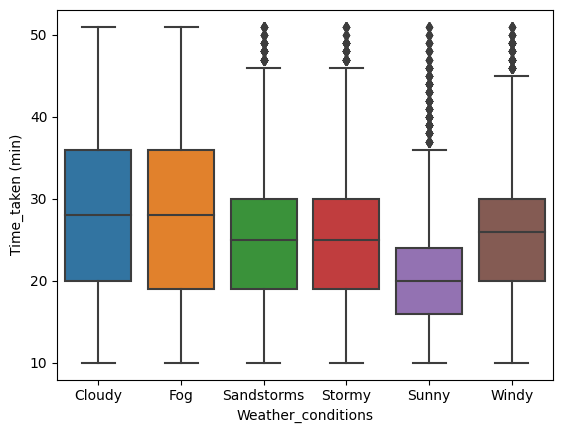

In [76]:
Bivariate_cont_cat(df,'Time_taken (min)','Weather_conditions')


# So Our Question is : Are weather condition affecting time taken?

# Yes Weather Condition Affecting Time Taken - So It is our Important variable 
# In Sunny Weather Our Delivery Might Be Fast Under 20 - 22 Minutes Expected 
# Based on other Weather we can see it taking more then 25  

Road_traffic_density       High       Jam        Low     Medium
Time_taken (min)      26.786369  30.18901  20.779526  26.420915


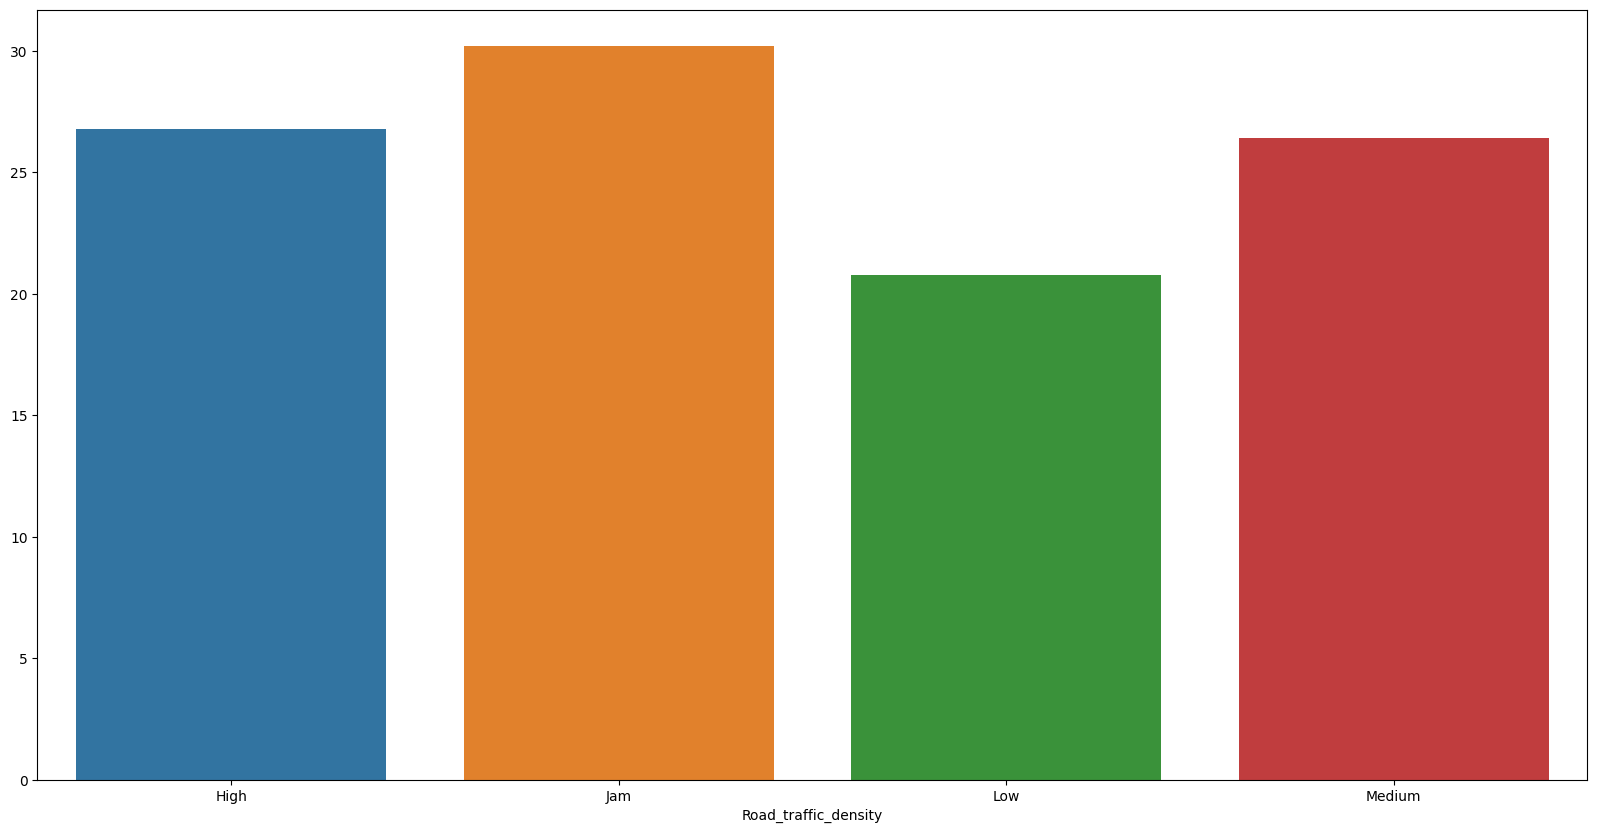

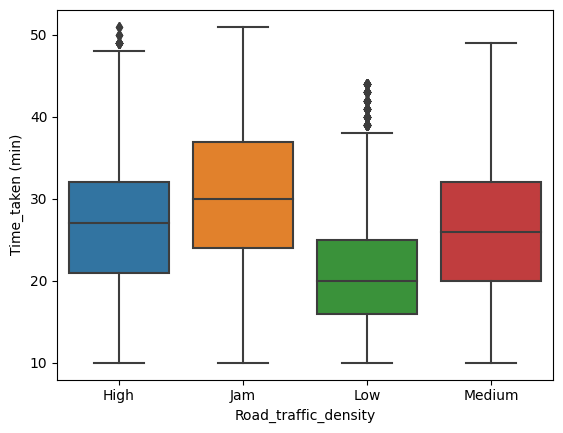

In [77]:
Bivariate_cont_cat(df,'Time_taken (min)','Road_traffic_density')

# If Low Road Traffic Density Time Taken is also less

In [78]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken (min)', 'Order_pickup_time', 'Year', 'Month', 'Day'],
      dtype='object')

Type_of_vehicle     bicycle  electric_scooter  motorcycle    scooter
Time_taken (min)  24.461538         23.931128   26.829225  23.855943


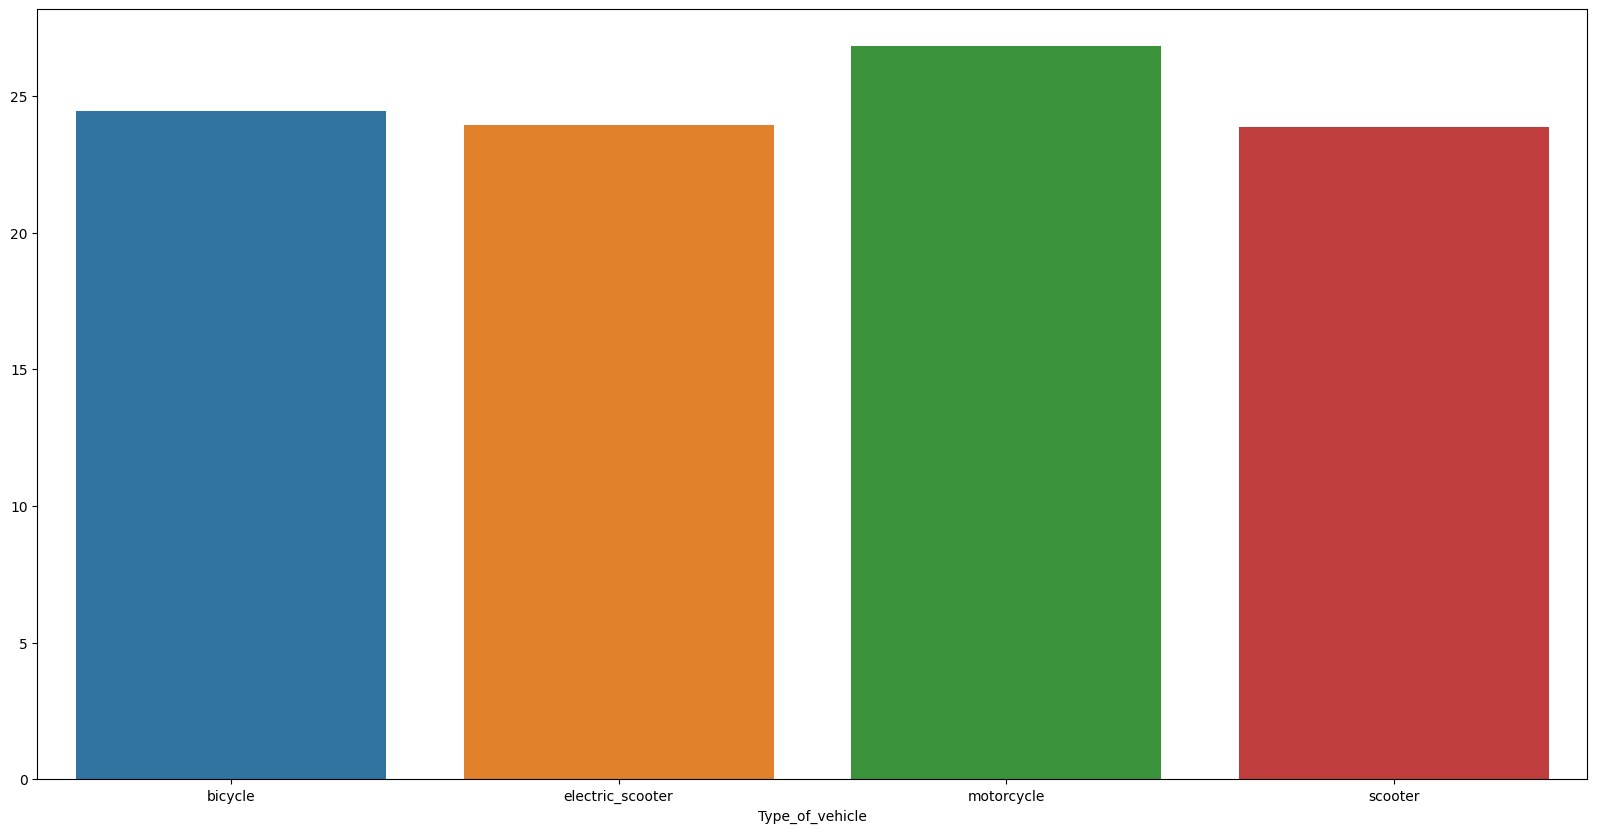

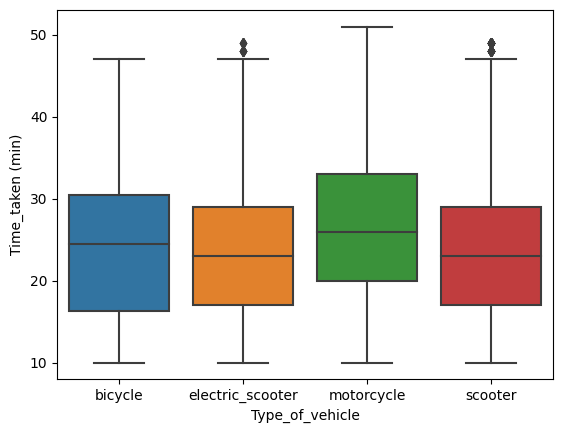

In [79]:
Bivariate_cont_cat(df,'Time_taken (min)','Type_of_vehicle')

# Type of Vechile is useful to check Time Taken.

Festival                 No        Yes
Time_taken (min)  25.393805  44.476395


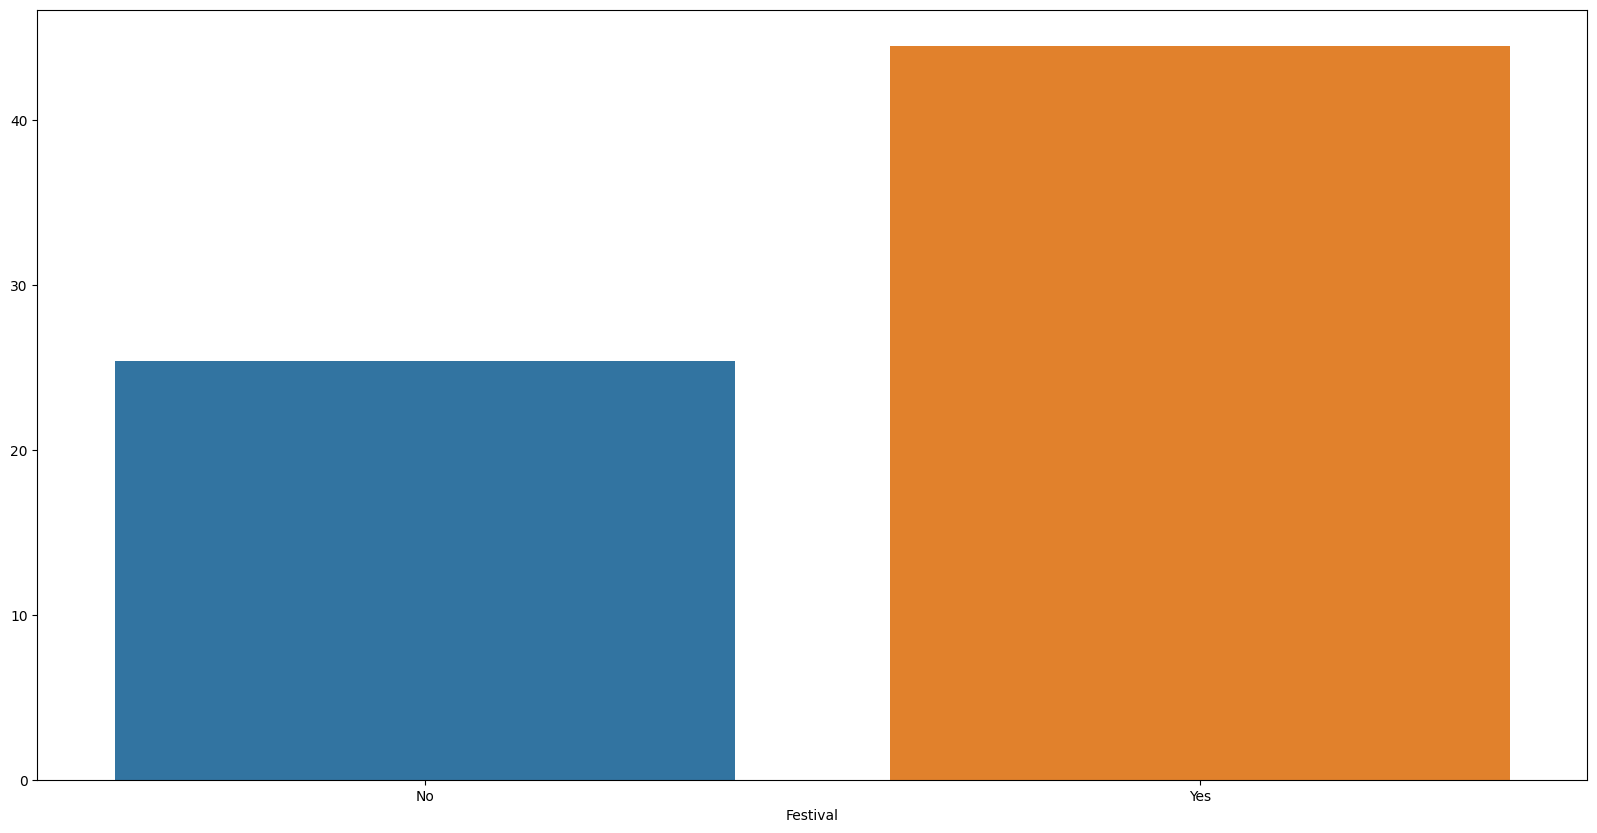

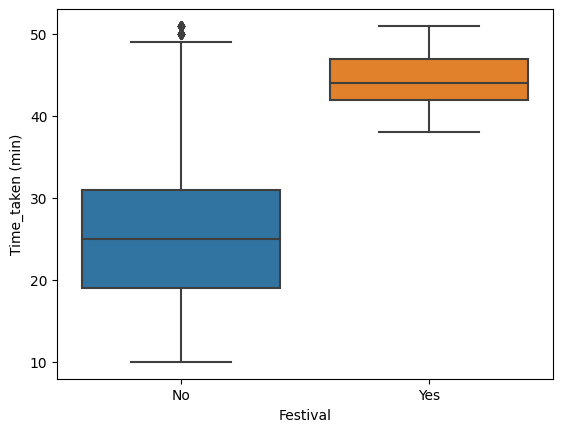

In [80]:
Bivariate_cont_cat(df,'Time_taken (min)','Festival')
# Here we can say In Festive season Time Taken of Delivery will be more !!!

City              Metropolitian  Semi-Urban      Urban
Time_taken (min)      26.627319   47.745763  22.472776


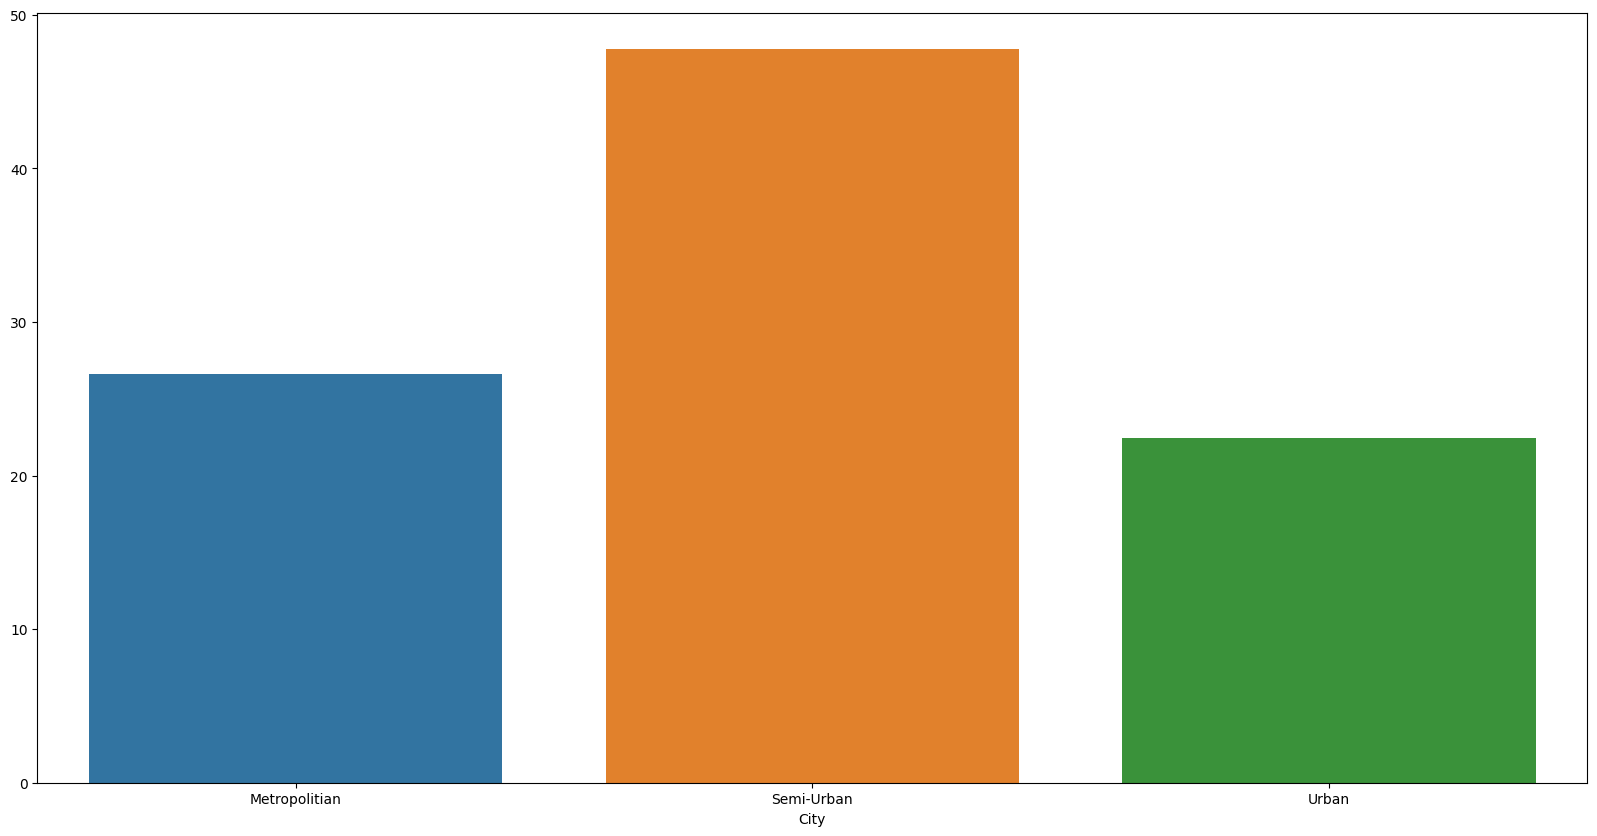

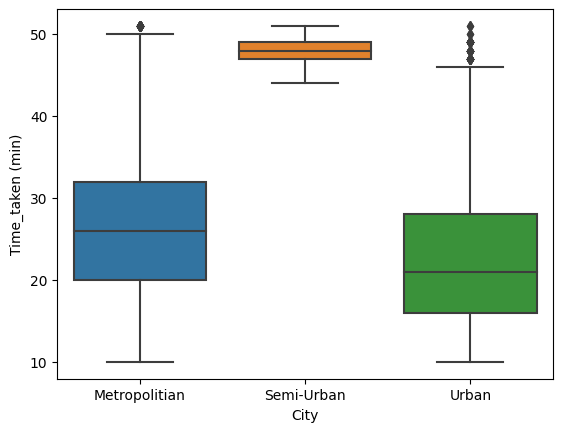

In [81]:
Bivariate_cont_cat(df,'Time_taken (min)','City')

# Semi Urban City Time Taken is more Compare to Metropolian and Urban City 

In [82]:
# Bivariate Analysis : Categorical Categorical


def BVA_categorical_plot(data, tar, cat):
    data = data[[cat,tar]][:]
    table = pd.crosstab(data[tar],data[cat],)
    print(table)
    #plotting grouped plot
    sns.countplot(x=cat, hue=tar, data=data)
    plt.show()

Type_of_order     Buffet  Drinks  Meal  Snack
Type_of_vehicle                              
bicycle                6       5    11      4
electric_scooter     650     656   615    649
motorcycle          4607    4573  4596   4640
scooter             2603    2679  2625   2686


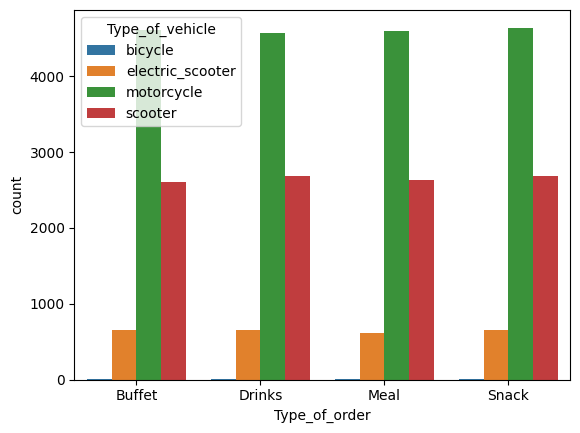

In [83]:
BVA_categorical_plot(df,'Type_of_vehicle','Type_of_order')
#Order By Different Type of Vechile 

City           Metropolitian  Semi-Urban  Urban
Type_of_order                                  
Buffet                  5876          14   1745
Drinks                  5831          14   1862
Meal                    5934          10   1720
Snack                   5918          21   1799


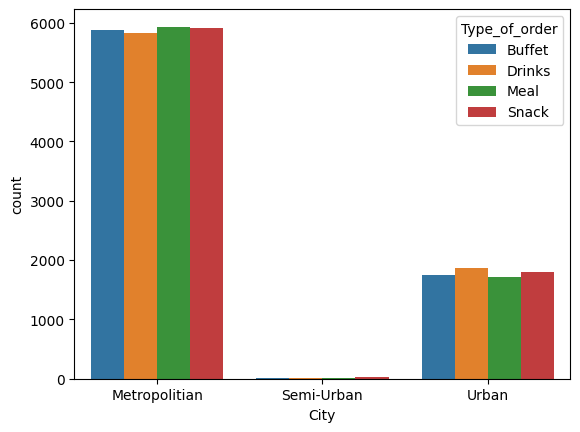

In [84]:
BVA_categorical_plot(df,'Type_of_order','City')

# In semi Urban There is No Ordering Happening Compare to Urban and Metropolian Cities.

City                  Metropolitian  Semi-Urban  Urban
Road_traffic_density                                  
High                           2480           5    708
Jam                            7313          46   1788
Low                            7726           0   2948
Medium                         5829           7   1631


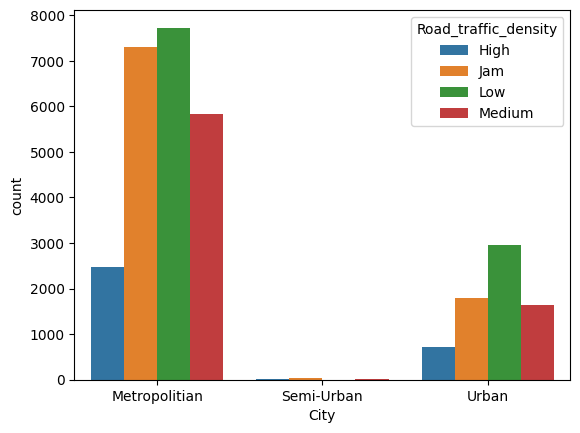

In [85]:
BVA_categorical_plot(df,'Road_traffic_density','City')

#  Mostly in Metropolian City There is High JAM Compare to Urban and Semi Urban 

City              Metropolitian  Semi-Urban  Urban
Type_of_vehicle                                   
bicycle                      17           0      9
electric_scooter           1916           2    585
motorcycle                13991          52   3916
scooter                    7635           5   2616


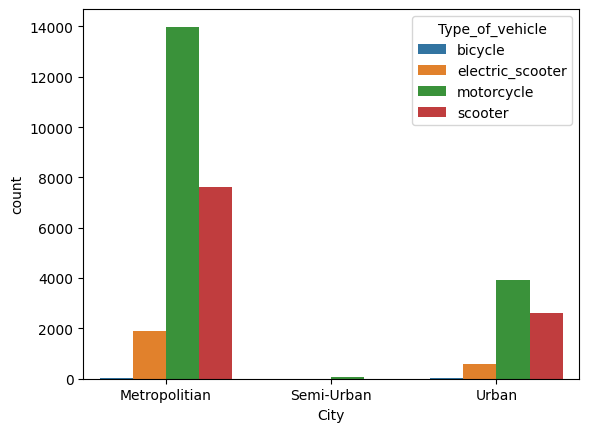

In [86]:
BVA_categorical_plot(df,'Type_of_vehicle','City')

# Mostly Motorcycle is Using in Metropolian City 

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31605 entries, 1 to 45582
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   ID                           31605 non-null  object  
 1   Delivery_person_ID           31605 non-null  category
 2   Delivery_person_Age          30458 non-null  Int64   
 3   Delivery_person_Ratings      30435 non-null  float64 
 4   Restaurant_latitude          31605 non-null  float64 
 5   Restaurant_longitude         31605 non-null  float64 
 6   Delivery_location_latitude   31605 non-null  float64 
 7   Delivery_location_longitude  31605 non-null  float64 
 8   Weather_conditions           31326 non-null  category
 9   Road_traffic_density         31334 non-null  category
 10  Vehicle_condition            31605 non-null  int64   
 11  Type_of_order                31605 non-null  category
 12  Type_of_vehicle              31605 non-null  category
 13  m

In [88]:
# Will Drop It ID And Delivery Person as we see in They were Not Contributing Much 

df.drop(columns=['ID','Delivery_person_ID'],inplace=True,axis=1)


In [90]:
# Also Dropping  Latitude and Longitude Variable which are High correlating with each other  

df.drop(columns=['Restaurant_latitude','Restaurant_longitude', 'Delivery_location_latitude','Delivery_location_longitude'],inplace=True)

In [93]:
df.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken (min)', 'Order_pickup_time', 'Year', 'Month', 'Day'],
      dtype='object')

In [94]:
# Summary of Univariate Analysis

# There is Relation B/w latitude longitute   
# Delivery Person Age has Not Much Relation With Time Taken 
# Delivery Rating has no relation with Time Taken 
# Is Time Ordered + Order_Pickup has some relation with Time taken ? 
    #So the Answer is No There is No Relation b/w them .
# Time Taken and Delivery Person has some small correlation which is less then 0.6. 
# Time Taken and Multiple Deliveries also small of correlation which is also less then 0.6.
# Scatter Plot :Shows No correlation between the variables.
# Weather Condition Affecting Time Taken
# In Sunny Weather Our Delivery Might Be Fast Under 20 - 22 Minutes Expected 
# Based on other Weather we can see it taking more then 25 Minutes
# If Low Road Traffic Density ,Time Taken is also less
# Type of Vechile is useful to check Time Taken.
# In Festive season Time Taken of Delivery will be more !!!
# Semi Urban City Time Taken is more Compare to Metropolian and Urban City 
# In semi Urban There is No Ordering Happening Compare to Urban and Metropolian Cities.
# Mobstly in Metropolian City There is High JAM Compare to Urban and Semi Urban
# Mostly Motorcycle is Using in Metropolian City 

In [96]:
# Saving of Current dataframe into CSV
df.to_csv('clean_data.csv', index=False)